# Exploring movie data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
DATA_PATH = "../../data/our_movie_data.csv"
pd.set_option("max_colwidth", None)

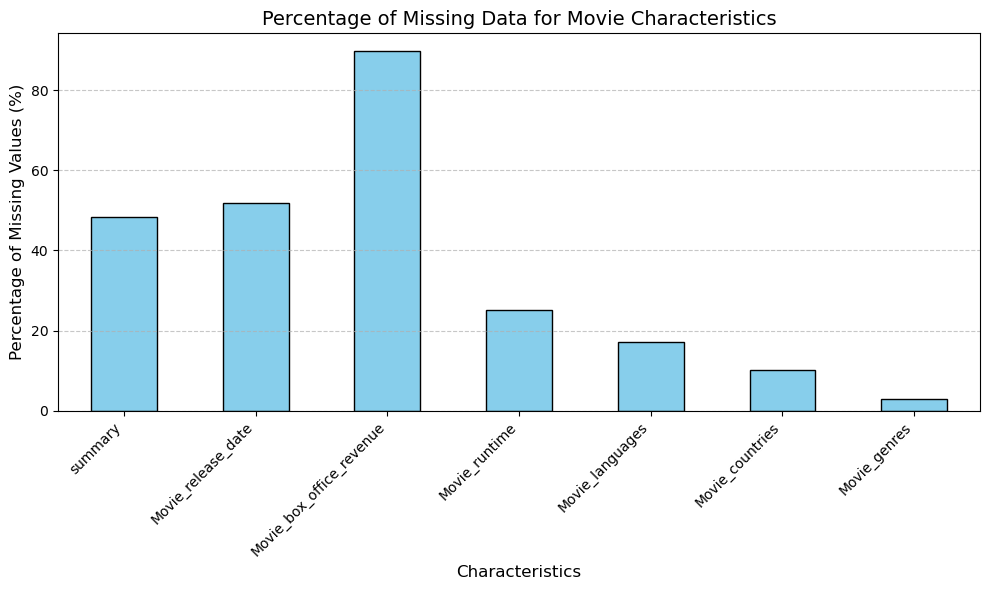

In [44]:
df_movie = pd.read_csv(DATA_PATH)

# Calculate the percentage of missing values
missing_percentage = df_movie.isna().sum() / len(df_movie) * 100

# Drop the first, third, and fourth columns
columns_to_exclude = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name']
filtered_missing_percentage = missing_percentage.drop(columns_to_exclude)

# Plot the filtered missing values as a bar chart
plt.figure(figsize=(10, 6))
filtered_missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Data for Movie Characteristics', fontsize=14)
plt.xlabel('Characteristics', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
df_movie.describe()


,Wikipedia_movie_ID,Movie_release_date,Movie_box_office_revenue,Movie_runtime
count,8.184000e+04,39372.000000,8.401000e+03,6.129100e+04
mean,1.741181e+07,1977.548816,4.799363e+07,1.118192e+02
std,1.098881e+07,30.938137,1.121753e+08,4.360070e+03
min,3.300000e+02,1892.000000,1.000000e+04,0.000000e+00
25%,7.324745e+06,1952.000000,2.083193e+06,8.100000e+01
50%,1.779234e+07,1989.000000,1.063969e+07,9.300000e+01
75%,2.716129e+07,2005.000000,4.071696e+07,1.060000e+02
max,3.750192e+07,2016.000000,2.782275e+09,1.079281e+06


## Movie plots

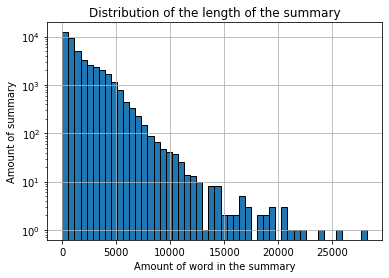

In [8]:
df_plot_length = df_movie["summary"].dropna().apply(len) 
df_plot_length.hist(bins=50, edgecolor='black')
plt.yscale('log')
plt.xlabel('Amount of word in the summary')
plt.ylabel('Amount of summary')
plt.title('Distribution of the length of the summary');

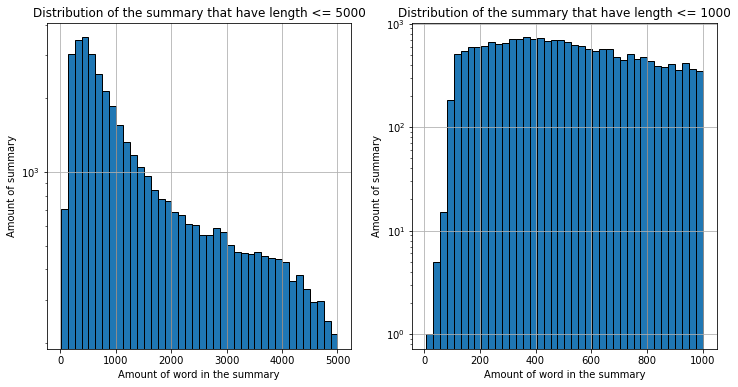

In [9]:
_, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.ravel()

df_length_summary_below_5000 = df_plot_length[df_plot_length <= 5000]
df_length_summary_below_5000.hist(bins=40, edgecolor='black', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('Amount of word in the summary')
axes[0].set_ylabel('Amount of summary')
axes[0].set_title('Distribution of the summary that have length <= 5000');


df_length_summary_below_1000 = df_plot_length[df_plot_length <= 1000]
df_length_summary_below_1000.hist(bins=40, edgecolor='black', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('Amount of word in the summary')
axes[1].set_ylabel('Amount of summary')
axes[1].set_title('Distribution of the summary that have length <= 1000');

Explanation of our choices for which plots to retrieve from wikipedia

## Movie genres

In [10]:
df_genre = df_movie[["Wikipedia_movie_ID", "Movie_genres"]].copy()
df_genre["Movie_genres"] = df_movie["Movie_genres"].str.split(", ").to_frame()
df_genre.dropna(inplace=True)
df_genre.sample(2)

,Wikipedia_movie_ID,Movie_genres
34039,13591001,[Martial Arts Film]
55121,24225314,"[Crime Fiction, Romance Film, Melodrama, Drama, Marriage Drama]"


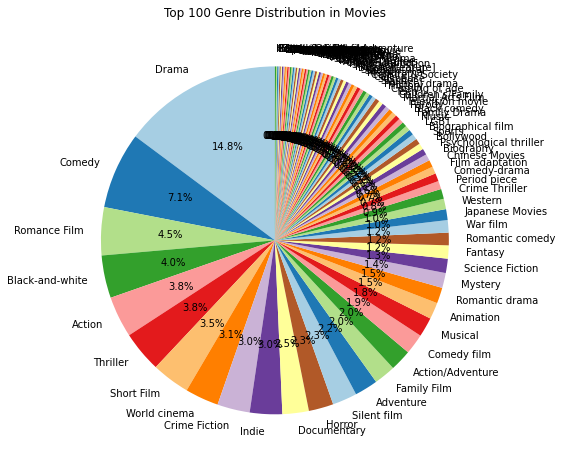

In [11]:
# Flatten the list of genres and get unique genre counts
all_genres = [genre for genres in df_genre['Movie_genres'] for genre in genres]
unique_genre, counts_genre = np.unique(all_genres, return_counts=True)

# Get the top 100 genres by count
top_100_indices = np.argsort(counts_genre)[::-1][:100]
top_100_genres = unique_genre[top_100_indices]
top_100_counts = counts_genre[top_100_indices]

# Create the pie chart for the top 100 genres
plt.figure(figsize=(10, 8))
plt.pie(top_100_counts, labels=top_100_genres, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 100 Genre Distribution in Movies')

# Display the pie chart
plt.show()


Given the incredible amount of different genre, we have to come up with a classification, the pie chart can help us in deciding what categories should be

In [12]:
genre_mapping = {
    'Action/Adventure': [
        'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 
        'Martial Arts Film', 'Samurai cinema', 'Adventure', 'Adventure Comedy',
        'Swashbuckler films', 'Costume Adventure', 'Western', 'Hybrid Western', 'Epic', 'Epic Western', 
        'Family-Oriented Adventure', 'Historical Epic', 'Indian Western', 'Spaghetti Western', 'Revisionist Western',
        'Escape Film', 'Glamorized Spy Film', 'Prison escape', 'Movies About Gladiators'
    ],
    'Comedy': [
        'Comedy', 'Comdedy', 'Comedy Thriller', 'Comedy Western', 'Comedy film', 
        'Comedy horror', 'Comedy of Errors', 'Comedy of manners', 'Comedy-drama', 
        'Workplace Comedy', 'Stand-up comedy', 'Screwball comedy',
        'Parody', 'Slapstick', 'Gross out', 'Gross-out film', 'Black comedy', 
        'Sex comedy', 'Farce', 'Satire', 'Dark comedy', 'Camp', 'Domestic Comedy', 
        'Courtroom Comedy', 'Horror Comedy', 'Humour', 'Beach Party film', 
        'Buddy Picture', 'Buddy film', 'Heavenly Comedy', 'Media Satire', 'Ealing Comedies'
    ],
    'Drama': [
        'Drama', 'Addiction Drama', 'Childhood Drama', 'Courtroom Drama', 
        'Historical drama', 'Inspirational Drama', 'Marriage Drama', 
        'Medical fiction', 'Melodrama', 'Psychological drama', 
        'Tragicomedy', 'Political drama', 'Prison film', 'Family Drama', 'Legal drama', 
        'Family & Personal Relationships', 'Social problem film', 'Interpersonal Relationships',
        'Social issues', 'Illnesses & Disabilities', 'Existentialism', 'Costume drama', 'Prison', 'Tragedy'
    ],
    'Fantasy/Sci-Fi': [
        'Fantasy', 'Fantasy Adventure', 'Fantasy Comedy', 'Fantasy Drama', 
        'Mythological Fantasy', 'Sword and Sorcery', 'Sword and sorcery films', 
        'Fairy tale', 'Supernatural', 'Surrealism', 'Absurdism', 'Magic Realism',
        'Sci-Fi', 'Sci-Fi Adventure', 'Sci-Fi Thriller', 
        'Science Fiction', 'Space opera', 'Future noir', 'Space western', 'Cyberpunk', 
        'Alien invasion', 'Alien Film', 'Dystopia', 'Utopia', 'Time travel', 
        'Steampunk', 'Post-apocalyptic', 'Robots', 'Science fiction Western', 'Punk rock', 
        'Revisionist Fairy Tale', 'Sci Fi Pictures original films', 'Apocalyptic and post-apocalyptic fiction'
    ],
    'Horror': [
        'Horror', 'Psychological horror', 'Natural horror films', 
        'Monster movie', 'Slasher', 'Splatter film', 'Zombie Film', 'Vampire movies', 
        'Werewolf fiction', 'Creature Film', 'Body Horror', 'Ghost Story', 
        'Demonic child', 'Gothic Film', 
        'Supernatural Horror', 'Sci-Fi Horror', 'Costume Horror', 'Period Horror', 'Road-Horror', 
        'Haunted House Film', 'Sexploitation', 'Softcore Porn', 
        'Doomsday film', 'Monster', 'Plague'
    ],
    'Romance': [
        'Romance', 'Romantic comedy', 'Romantic drama', 'Romantic fantasy', 
        'Romantic thriller', 'Love Story', 'Erotic Drama', 'Erotic thriller', 
        'Romance Film', 'Coming-of-age film', 'Chick flick', 'Erotica'
    ],
    'Thriller': [
        'Thriller', 'Political thriller', 'Psychological thriller', 
        'Crime Thriller', 'Mystery', 'Spy', 'Suspense', 'Whodunit', 'Conspiracy fiction', 
        'Detective', 'Chase Movie', 'Crime Fiction', 'Gangster Film', 'Master Criminal Films', 
        'Detective fiction', 'Political satire', 'Law & Crime', 'Gangster', 
        'Buddy cop'
    ],
    'Documentary': [
        'Documentary', 'Docudrama', 'Historical Documentaries', 
        'Political Documetary', 'Nature', 'True Crime', 'Music Documentary', 
        'Science Documentary', 'Sports Documentary', 'Cultural Documentary', 
        'Education', 'Anthropology', 'History', 'Environmental Science', 'Animals',
        'Archives and records', 'Culture & Society', 'Educational', 'Graphic & Applied Arts', 
        'Health & Fitness', 'Inventions & Innovations', 'Language & Literature', 'Journalism', 
        'Libraries and librarians', 'Linguistics', 'Media Studies', 'Political cinema', 'Rockumentary',
        'Archaeology', 'Travel', 'World History'
    ],
    'Family/Animation': [
        'Animation', 'Animated cartoon', 'Anime', 'Computer Animation', 
        'Clay animation', 'Silhouette animation', 'Animated Musical', 
        'Stop motion', 'Supermarionation', 'Live action', 'Children\'s', 'Children\'s Fantasy', 
        'Family Film', 'Children\'s Entertainment', "Children's Issues", "Children's/Family",
        'Christmas movie'
    ],
    'Musical': [
        'Musical', 'Musical Drama', 'Musical comedy', 'Jukebox musical', 
        'Film-Opera', 'Operetta', 'Backstage Musical', 'Concert film', 
        'Singing cowboy', 'Dance', 'Instrumental Music', 'Music'
    ],
    'War/Crime': [
        'War film', 'Combat Films', 'Military', 'Anti-war film', 'World War II', 
        'Gulf War', 'Crime', 'Crime Comedy', 'Crime Drama',
        'Heist', 'Police Procedural',  'Juvenile Delinquency Film', 'Cold War',
        'War effort', 'Revenge', 'Outlaw biker film', 'Outlaw', 'Patriotic film',
        'Private military company', 'Cavalry Film', 'British Empire Film'
    ],
    'Sports': [
        'Sports', 'Boxing', 'Baseball', 'Basketball', 'Football', 'Soccer', 
        'Auto racing', 'Horse racing', 'Extreme Sports', 'Parkour in popular culture', 
        'Breakdance'
    ],
    'LGBTQ+': [
        'LGBT', 'Gay', 'Gay Interest', 'Gay Themed', 'Homoeroticism', 
        'Queer Cinema', 'New Queer Cinema', 'Gay pornography', 'Pornographic movie', 
        'Pinku eiga', 'Pornography', 'Feminist Film'
    ],
    'Others': [
        'B-Movie', 'Mockumentary', 'Mondo film', 'Cult', 'Art film', 'Film Noir', 
        'New Wave', 'Czechoslovak New Wave', 'Kitchen sink realism', 'Neo-noir', 
        'Blaxploitation', 'Bollywood', 'World cinema', 'Z movie', 'Experimental film', 'Avant-garde',
        'Expressionism', 'Essay Film', 'Abstract', 'Structural Film', 'Americana', 'Coming of age', 'Biographical film',
        'Biography', 'Historical fiction', 'Period piece', 'Biker Film', 'B-Western', 'B-movie', 'C-Movie', 
        'Caper story', 'Feature film', 'Fictional film', 'Filipino', 'Filipino Movies', 'Film', 'Film adaptation',
        'Film noir', 'Film à clef', 'Filmed Play', 'Finance & Investing', 'Foreign legion', 'Gender Issues',
        'Giallo', 'Goat gland', 'Hardcore pornography', 'Heaven-Can-Wait Fantasies', 'Hip hop movies', 'Holiday Film',
        'Exploitation', 'Fan film', 'Female buddy film', 'Film & Television History', 'Film serial', 'Horror comedy',
        'Mumblecore', 'Neorealism', 'News', 'Ninja movie', 'Northern', 'Nuclear warfare', 'Point of view shot',
        'Pre-Code', 'Psycho-biddy', 'Race movie', 'Reboot', 'Remake', 'Road movie', 'Roadshow theatrical release',
        'School story', 'Short Film', 'Silent film', 'Slice of life story', 'Sponsored film', 'Star vehicle', 
        'Statutory rape', 'Stoner film', 'Superhero', 'Superhero movie', 'Sword and Sandal', 'Sword and sorcery',
        'Tamil cinema', 'Teen', 'Television movie', 'The Netherlands in World War II', 'Theremin music', 'Therimin music',
        'Acid western', 'Adult', 'Airplanes and airports', 'Albino bias', 'Animal Picture', 'Anthology', 'Anti-war',
        'Beach Film', 'Bengali Cinema', 'Biopic [feature]', 'Black-and-white', 'Bloopers & Candid Camera',
        'British New Wave', 'Bruceploitation', 'Business', 'Chinese Movies', 'Computers', 'Disaster', 'Dogme 95',
        'Early Black Cinema', 'Ensemble Film', 'Indie', 'Japanese Movies', 'Jungle Film', 'Kafkaesque', 'Latino',
        'Malayalam Cinema', 'Movie serial', 'New Hollywood', 'Roadshow/Carny', 'Tokusatsu', 'Tollywood',
        'Women in prison films', 'Wuxia', 'Natural disaster', 'Christian film', 'Religious Film', 'Hagiography', 'Propaganda film', 
        'Spirituality', 'Biblical Film'
    ]
}


In [13]:
def check_genres_in_mapping(genre_mapping, genre_list):
    # Collect all genres from the genre_mapping
    all_genres = [genre for genres in genre_mapping.values() for genre in genres]
    
    # Check if all genres in the genre_list are present in the genre_mapping
    missing_genres = [genre for genre in genre_list if genre not in all_genres]
    
    if missing_genres:
        print("Missing genres:")
        for genre in missing_genres:
            print(genre)
    else:
        print("All genres from the list are present in the genre mapping.")

check_genres_in_mapping(genre_mapping, unique_genre)

All genres from the list are present in the genre mapping.


In [14]:
def find_duplicates(genre_mapping):
    all_genres = []
    duplicate_genres = set()

    # Collect all genres from the genre_mapping
    for genres in genre_mapping.values():
        all_genres.extend(genres)

    # Find duplicate genres
    seen_genres = set()
    for genre in all_genres:
        if genre in seen_genres:
            duplicate_genres.add(genre)
        else:
            seen_genres.add(genre)
    
    # Print duplicates
    if duplicate_genres:
        print("Duplicate genres:")
        for genre in duplicate_genres:
            print(genre)
    else:
        print("No duplicate genres found.")
find_duplicates(genre_mapping)

No duplicate genres found.


In [15]:
def recategorize_genre(genre_mapping, genre_list):
    new_genre_set = set()  # Use a set to avoid duplicates and improve lookup times
    for genre in genre_list:
        for category, genres in genre_mapping.items():
            if genre in genres:
                new_genre_set.add(category)  # Add the category to the set
    return list(new_genre_set)  # Convert the set back to a list if needed

df_genre['category'] = df_genre['Movie_genres'].apply(lambda genres: recategorize_genre(genre_mapping, genres))

In [16]:
df_genre.sample(5)

,Wikipedia_movie_ID,Movie_genres,category
7186,2129869,"[Romance Film, Musical, Drama, Chinese Movies, Comedy]","[Musical, Drama, Romance, Others, Comedy]"
53199,23670000,[Drama],[Drama]
45092,19820100,[Horror],[Horror]
57249,25193897,"[Romantic comedy, Musical, Comedy, Musical comedy]","[Musical, Comedy, Romance]"
34567,13887546,[Science Fiction],[Fantasy/Sci-Fi]


This dataframe can now be linked to the sentiment analysis

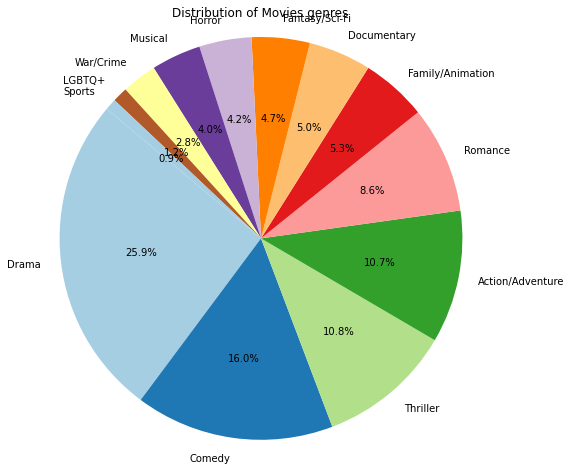

In [17]:
genre_counts = df_genre['category'].explode().value_counts()
genre_counts_filtered = genre_counts[genre_counts.index != 'Others']

plt.figure(figsize=(8, 8))
plt.pie(genre_counts_filtered, labels=genre_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Movies genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

One question stays : do we allow a film to have multiple genre or do we keep only one ?

## Box office, release date and countries

### Box office and release date

In [18]:
df_movie.isna().sum() / len(df_movie) * 100

Wikipedia_movie_ID           0.000000
summary                     48.321114
Freebase_movie_ID            0.120968
Movie_name                   0.120968
Movie_release_date          51.891496
Movie_box_office_revenue    89.734848
Movie_runtime               25.108749
Movie_languages             17.063783
Movie_countries             10.084311
Movie_genres                 2.923998
dtype: float64

As we have seen before, box office would clearly need to be increased via scraping since 90% of the information does not exist, in our analysis we probably will not need runtime and languages so we refrain from exploring it. Also plots will be scraped as they are the center of our analysis. If we extend our analysis through time periods, we may also want to scrape release years.

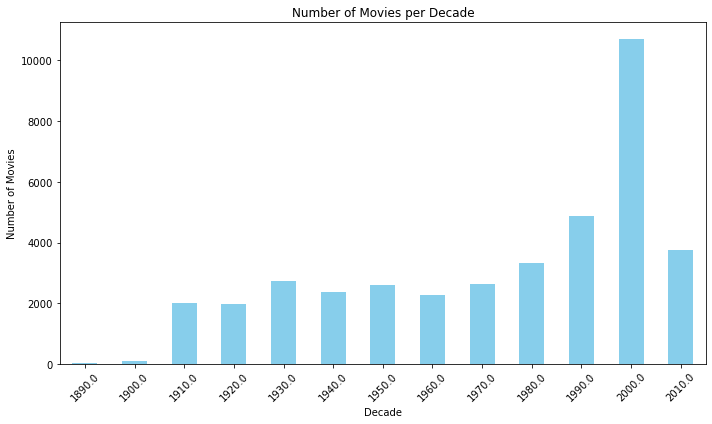

In [19]:
df_movie['decade'] = (df_movie['Movie_release_date'].dropna().astype(int) // 10) * 10
decade_counts = df_movie['decade'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

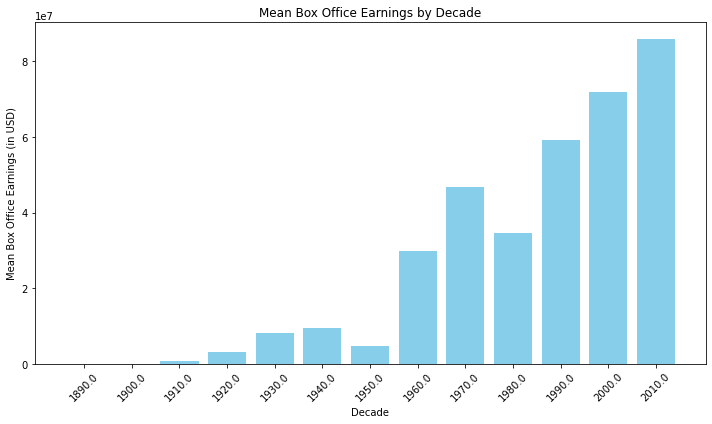

In [20]:
mean_box_office_by_decade = df_movie.groupby('decade')['Movie_box_office_revenue'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_box_office_by_decade.index.astype(str), mean_box_office_by_decade.values, color='skyblue')
plt.title('Mean Box Office Earnings by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Box Office Earnings (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

We observe the mean box office tends to increase with the decades

### Countries representation

In [48]:
df_countries = df_movie[["Wikipedia_movie_ID", "Movie_countries"]].copy()
df_countries["Movie_countries"] = df_movie["Movie_countries"].str.split(", ").to_frame()
df_countries.dropna(inplace=True)

In [50]:
all_countries = [c for cs in df_countries['Movie_countries'] for c in cs]
unique_country, counts_country = np.unique(all_countries, return_counts=True)
print(len(unique_country))
print(list(unique_country))

147
['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Crime', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Democratic Republic of the Congo', 'Denmark', 'Egypt', 'England', 'Estonia', 'Ethiopia', 'Federal Republic of Yugoslavia', 'Finland', 'France', 'Georgia', 'Georgian SSR', 'German Democratic Republic', 'German Language', 'Germany', 'Greece', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Iraqi Kurdistan', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kingdom of Great Britain', 'Kingdom of Italy', 'Korea', 'Kuwait', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macau', 'Malayal

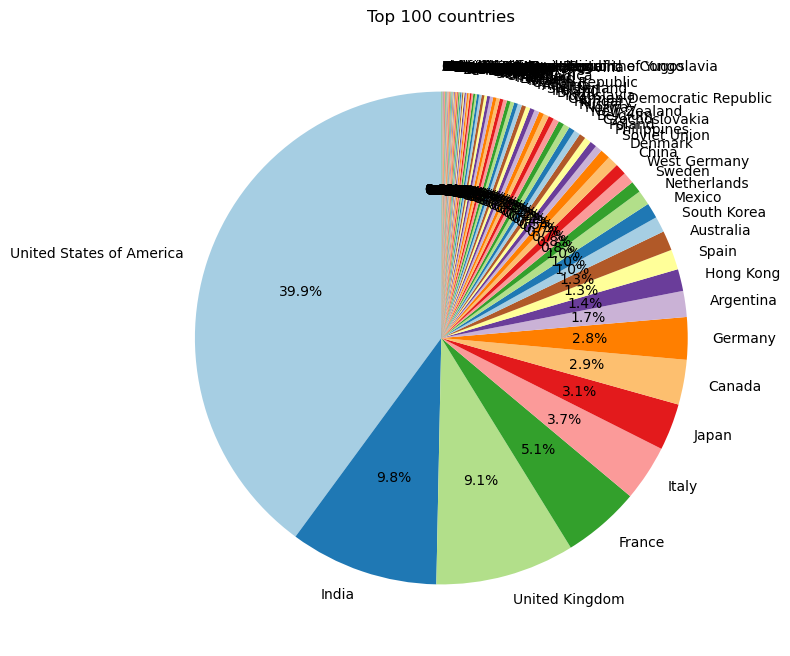

In [51]:
# Get the top 100 genres by count
top_100_indices = np.argsort(counts_country)[::-1][:100]
top_100_countries = unique_country[top_100_indices]
top_100_counts = counts_country[top_100_indices]

# Create the pie chart for the top 100 genres
plt.figure(figsize=(10, 8))
plt.pie(top_100_counts, labels=top_100_countries, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 100 countries')

# Display the pie chart
plt.show()

In [52]:
country_mapping = {
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 
        'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Malaysia', 
        'Maldives', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestinian Territories', 'Philippines', 
        'Qatar', 'Republic of China (Taiwan)', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 
        'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen',
        "Burma", "Georgian SSR", "Hong Kong", "Iraqi Kurdistan", "Korea", "Macau", "Mandatory Palestine",
        "Palestinian territories", "Republic of China", "Taiwan", "Uzbek SSR", "Soviet Union", "Malayalam Language"
    ],
    'Africa': [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 
        'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 
        'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast (Côte d\'Ivoire)', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
        'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 
        'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 
        'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 
        'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
        'Ukraine', 'United Kingdom', "Crime", "Czechoslovakia", "England", "Federal Republic of Yugoslavia", "German Democratic Republic",
        "Isle of Man", "Kingdom of Great Britain", "Kingdom of Italy", "Northern Ireland",
        "Republic of Macedonia", "Scotland", "Serbia and Montenegro", "Slovak Republic",
        "Socialist Federal Republic of Yugoslavia", "Soviet occupation zone", "Ukrainian SSR", "Ukranian SSR",
        "Wales", "Weimar Republic", "West Germany", "Yugoslavia", "German Language", "Nazi Germany"
    ],
    'North America': [
        'Canada', 'Costa Rica', 'Cuba', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 
        'Nicaragua', 'Panama', 'United States of America', "Aruba", "Bahamas", "Puerto Rico"
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 
        'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ]
}

In [53]:
def check_countries_in_mapping(country_mapping, country_list):
    # Collect all genres from the genre_mapping
    all_countries = [c for cs in df_countries['Movie_countries'] for c in cs]

    # Check if all genres in the genre_list are present in the genre_mapping
    missing_countries = [c for c in country_list if c not in all_countries]
    
    if missing_countries:
        print("Missing genres:")
        for c in missing_countries:
            print(c)
    else:
        print("All countries from the list are present in the country mapping.")

check_countries_in_mapping(country_mapping, unique_country)

All countries from the list are present in the country mapping.


In [54]:
def recategorize_countries(country_list, country_mapping):
    new_continent = set()  
    for genre in country_list:
        for category, genres in country_mapping.items():
            if genre in genres:
                new_continent.add(category) 
    return list(new_continent) 

df_countries['continent'] = df_countries['Movie_countries'].apply(lambda c: recategorize_countries(c, country_mapping)[0])
df_countries.sample(2)

,Wikipedia_movie_ID,Movie_countries,continent
778,142417,[United States of America],North America
14170,4633684,[United States of America],North America


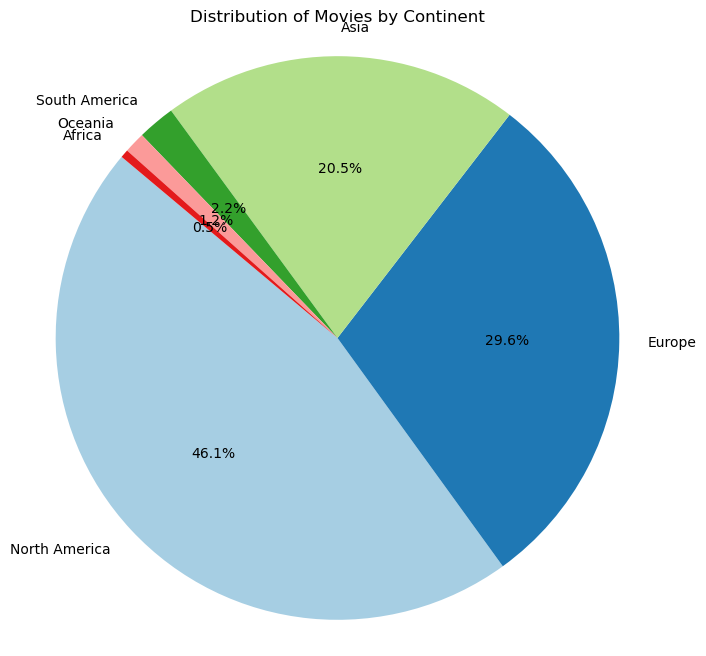

In [55]:
continent_counts = df_countries['continent'].explode().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Movies by Continent')
plt.axis('equal')
plt.show()

In [56]:
DATA_PATH = "../../data/our_movie_data_extended.csv"
df_extended = pd.read_csv(DATA_PATH, index_col="Wikipedia_movie_ID")

In [29]:
import ast
df_extended['category'] = df_extended['category'].dropna().apply(ast.literal_eval)

In [30]:
df_extended = df_extended.explode('category')
df_category_per_continent = df_extended.groupby(['continent', 'category']).size().reset_index(name='count')

Text(0.5, 0.98, 'distribution of film per continent')

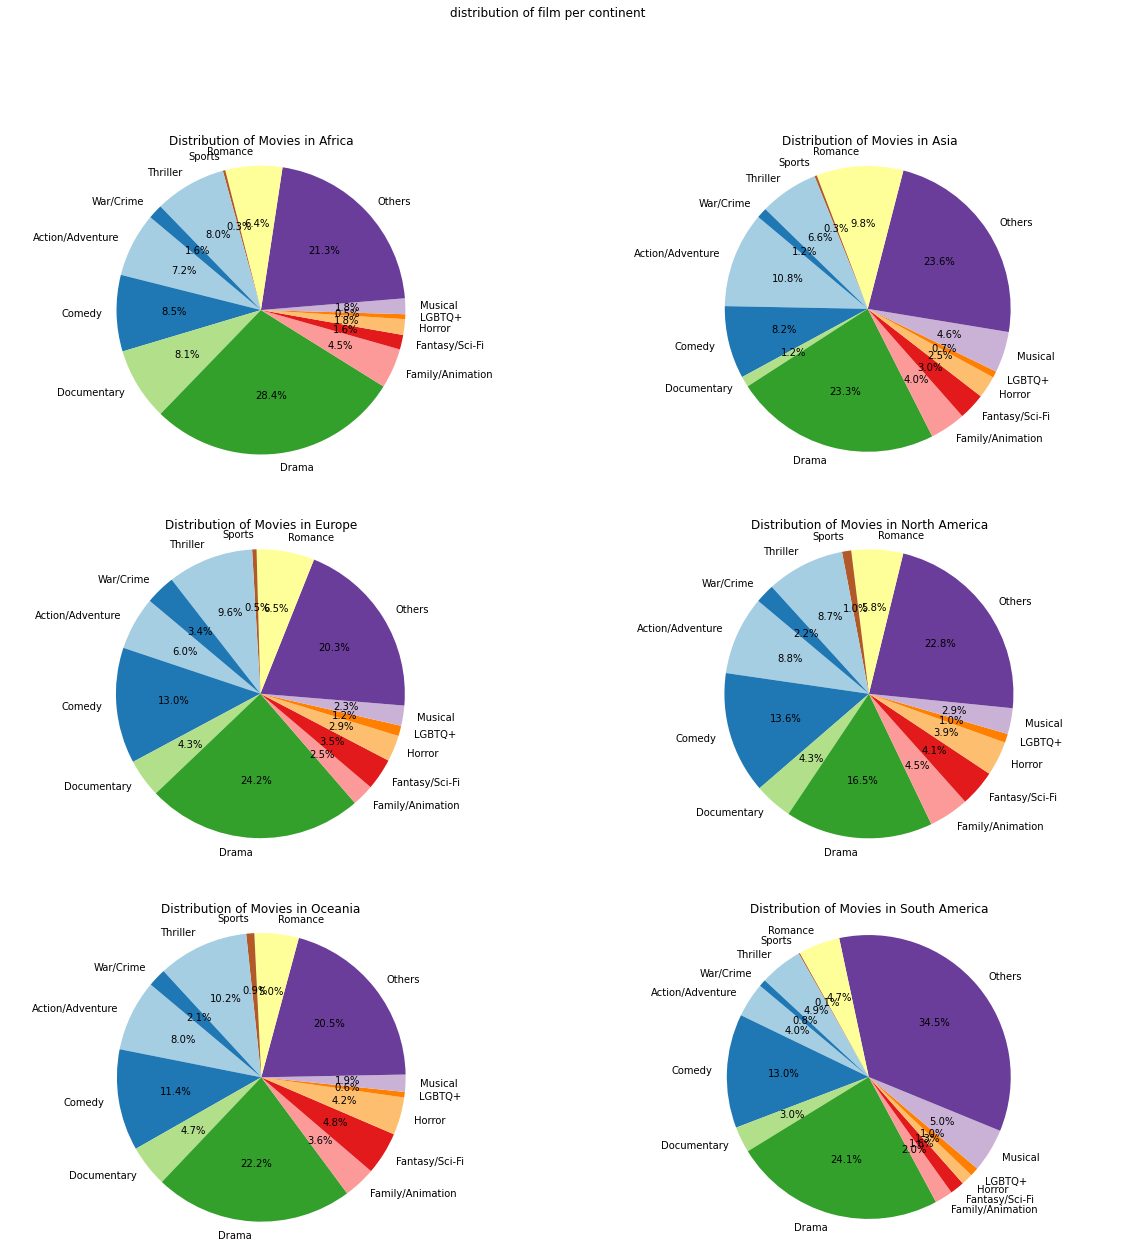

In [31]:
_, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.ravel()
for continent_name, ax in zip(df_category_per_continent['continent'].unique(), axes):
    continent = df_category_per_continent[df_category_per_continent['continent'] == continent_name].set_index('category')
    ax.pie(continent['count'], labels=continent.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    c = continent['continent'][0]
    ax.set_title(f'Distribution of Movies in {c}')
    ax.axis('equal')
plt.suptitle('distribution of film per continent')

### Adding the category and continent columns to our data

In [48]:
clean_df = pd.read_csv(DATA_PATH)
print(clean_df.shape)
print(clean_df.columns)

(81840, 10)
Index(['Wikipedia_movie_ID', 'summary', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres'],
      dtype='object')


In [49]:
category_joined = clean_df.merge(df_genre[['Wikipedia_movie_ID', 'category']], on='Wikipedia_movie_ID', how='outer')
print(category_joined.shape)
print(category_joined.columns)

(81840, 11)
Index(['Wikipedia_movie_ID', 'summary', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'category'],
      dtype='object')


In [50]:
continent_joined = category_joined.merge(df_countries[['Wikipedia_movie_ID', 'continent']], on='Wikipedia_movie_ID', how='outer')
print(continent_joined.shape)
print(continent_joined.columns)

(81840, 12)
Index(['Wikipedia_movie_ID', 'summary', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'category',
       'continent'],
      dtype='object')


In [51]:
#continent_joined.to_csv('../../data/our_movie_data_extended.csv', index=False)
continent_joined.to_pickle('../../data/our_movie_data_extended.pkl')